In [2]:
!pip install pymysql
!pip install mysql-connector-python

In [3]:
import pandas as pd
from sqlalchemy import create_engine
# Replace these values with your actual database information
hostname = "gator3228.hostgator.com"
username = "rbrennan_sm_rp"
password = "This_is_not_the_password"
database = "rbrennan_stock_project_4"
# Create a database connection
db_url = f"mysql+mysqlconnector://{username}:{password}@{hostname}/{database}"
engine = create_engine(db_url)
# Test the connection
try:
    conn = engine.connect()
    print("Connected to MySQL database")
except Exception as e:
    print("Error:", e)

Connected to MySQL database


In [4]:
from sqlalchemy.sql.expression import text
data = pd.read_sql(text("SELECT * FROM Netflix"), conn)
data.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-20,277.739990,285.809998,276.609985,278.549988,7769000
1,2018-02-21,282.070007,286.640015,280.010010,281.040009,9371100
2,2018-02-22,283.880005,284.500000,274.450012,278.140015,8891500
3,2018-02-23,281.000000,286.000000,277.809998,285.929993,7301800
4,2018-02-26,288.750000,295.649994,287.010010,294.160004,10268600


In [5]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import warnings

In [7]:
# read csv/create dataframe
netflix_df = pd.read_csv("/content/drive/MyDrive/Data-Modeling-Project/Netflix.csv")
netflix_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2018-02-20,277.739990,285.809998,276.609985,278.549988,7769000
1,2018-02-21,282.070007,286.640015,280.010010,281.040009,9371100
2,2018-02-22,283.880005,284.500000,274.450012,278.140015,8891500
3,2018-02-23,281.000000,286.000000,277.809998,285.929993,7301800
4,2018-02-26,288.750000,295.649994,287.010010,294.160004,10268600
5,2018-02-27,294.769989,297.359985,290.589996,290.609985,9416500
6,2018-02-28,293.100006,295.750000,290.779999,291.380005,7653500
7,2018-03-01,292.750000,295.250000,283.829987,290.390015,11932100
8,2018-03-02,284.649994,301.179993,283.230011,301.049988,13345300
9,2018-03-05,302.850006,316.910004,297.600006,315.000000,18986100


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# make copy for visualizations
visualizations = netflix_df.copy()

In [9]:
# list columns
netflix_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [10]:
# check for missing values
missing_values = netflix_df.isnull().sum()
missing_values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
# dataframe info
netflix_info = netflix_df.info()
netflix_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1404 non-null   object 
 1   Open    1404 non-null   float64
 2   High    1404 non-null   float64
 3   Low     1404 non-null   float64
 4   Close   1404 non-null   float64
 5   Volume  1404 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 65.9+ KB


In [12]:
# display stats for each column
summary_stats = netflix_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Open,1404.0,3.894075e+02,1.125745e+02,1.639600e+02,3.110600e+02,3.636200e+02,4.873425e+02,6.923500e+02
High,1404.0,3.955367e+02,1.132316e+02,1.720600e+02,3.168000e+02,3.688900e+02,4.935875e+02,7.009900e+02
Low,1404.0,3.830407e+02,1.115580e+02,1.627100e+02,3.056400e+02,3.580600e+02,4.806700e+02,6.860900e+02
Close,1404.0,3.894229e+02,1.123143e+02,1.663700e+02,3.122175e+02,3.636250e+02,4.868825e+02,6.916900e+02
Volume,1404.0,7.987430e+06,6.610481e+06,1.144000e+06,4.400800e+06,6.261300e+06,9.513850e+06,1.333875e+08


In [13]:
# convert date to datetime
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])

<Axes: >

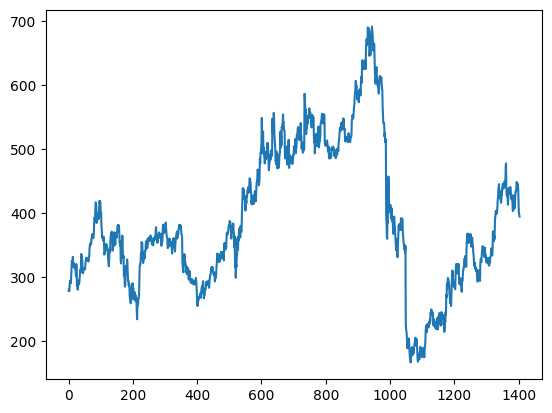

In [14]:
# plot closing
netflix_df['Close'].plot()

In [15]:
from sklearn.model_selection import train_test_split

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

#split data
train_data, test_data = train_test_split(netflix_df, test_size=0.2, shuffle=False)

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
arima_model =ARIMA(train_data[target], order=(1, 1, 2))
arima_fit = arima_model.fit()

In [18]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(mse)

15579.384064432528


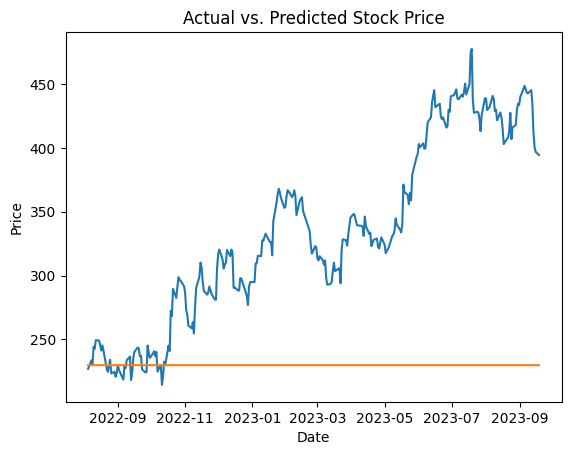

In [19]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()

In [20]:
pip install xgboost

In [21]:
import xgboost as xgb

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 1000,
    'learning_rate': 0.1000
}

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)

In [22]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)

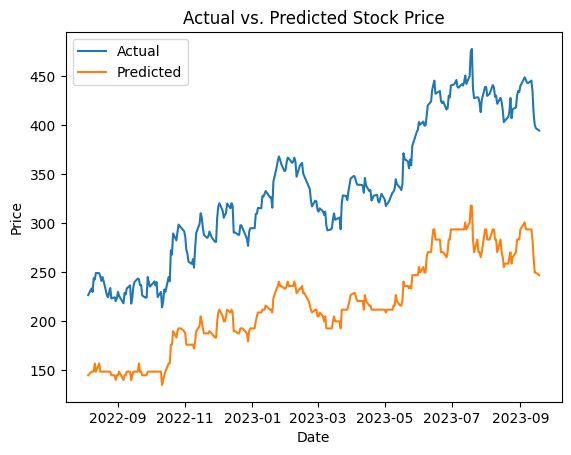

In [23]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], xgb_predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()